In [1]:
import litebird_sim as lbs
import numpy as np
from swipe_modules import scanning_strategy
import matplotlib.pyplot as plt
import healpy as hp

In [2]:
sim = lbs.Simulation(
    start_time=0,
    duration_s=36*3600,
    description="SWIPE simulation",
)

In [3]:
sim.generate_spin2ecl_quaternions(scanning_strategy.SwipeScanningStrategy(),delta_time_s=1)

In [4]:
instr = lbs.InstrumentInfo(
    name="swipe",
    spin_boresight_angle_rad=np.deg2rad(40),
)
sampling_hz = 10
hwp_radpsec = np.pi
nside = 256

In [5]:
det0 = lbs.DetectorInfo(
    name="Boresight_detector_0",
    sampling_rate_hz=sampling_hz,
    bandcenter_ghz=145.0,
    quat=[0.0, 0.0, 0.0, 1.0],
    fwhm_arcmin = 60.0,
)

det1 = lbs.DetectorInfo(
    name="Boresight_detector_1",
    sampling_rate_hz=sampling_hz,
    bandcenter_ghz=145.0,
    quat=[0.0, 0.0, 1.0 / np.sqrt(2.0), 1.0 / np.sqrt(2.0)],
    fwhm_arcmin = 60.0,
)

In [6]:
obs, = sim.create_observations(detectors=[det0,det1])
pointings = lbs.get_pointings(
    obs,
    sim.spin2ecliptic_quats,
    detector_quats=[det0.quat,det1.quat],
    bore2spin_quat=instr.bore2spin_quat,
)

In [7]:
Mbsparams = lbs.MbsParameters(make_cmb =True,
                              make_fg = True,
                              fg_models=["pysm_ame_1","pysm_synch_0", "pysm_freefree_1","pysm_synch_0"],
                              gaussian_smooth = True,
                              bandpass_int = False,
                              nside = nside,
                             )

In [8]:
mbs = lbs.Mbs(simulation=sim,
              parameters=Mbsparams,
              detector_list=[det0,det1],
             )

In [9]:
in_map = mbs.run_all()[0]

[2021-12-15 14:53:07,026 INFO MPI#0000] generating and saving cmb simulations
[2021-12-15 14:53:07,070 WARNING MPI#0000] AstropyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
[2021-12-15 14:53:07,150 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2021-12-15 14:53:07,151 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2021-12-15 14:53:07,420 INFO MPI#0000] Access data from cmb/0000/cmb_0000_date_211215.fits
[2021-12-15 14:53:07,423 INFO MPI#0000] NSIDE = 256
[2021-12-15 14:53:07,424 INFO MPI#0000] ORDERING = RING in fits file
[2021-12-15 14:53:07,425 INFO MPI#0000] INDXSCHM = IMPLICIT


***************** D
***************** D
***************** D


[2021-12-15 14:53:07,637 WARNING MPI#0000] AstropyDeprecationWarning: "verbose" was deprecated in version 1.15.0 and will be removed in a future version. 
[2021-12-15 14:53:08,411 INFO MPI#0000] Sigma is 25.479654 arcmin (0.007412 rad) 
[2021-12-15 14:53:08,412 INFO MPI#0000] -> fwhm is 60.000000 arcmin
[2021-12-15 14:53:08,424 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2021-12-15 14:53:08,425 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2021-12-15 14:53:09,364 INFO MPI#0000] Sigma is 25.479654 arcmin (0.007412 rad) 
[2021-12-15 14:53:09,364 INFO MPI#0000] -> fwhm is 60.000000 arcmin
[2021-12-15 14:53:09,375 INFO MPI#0000] Sigma is 0.000000 arcmin (0.000000 rad) 
[2021-12-15 14:53:09,376 INFO MPI#0000] -> fwhm is 0.000000 arcmin
[2021-12-15 14:53:09,533 INFO MPI#0000] generating and saving fg simulations
[2021-12-15 14:53:09,535 INFO MPI#0000] Retrieve data for pysm_2/ame_t_new.fits (if not cached already)
[2021-12-15 14:53:09,586 INFO MPI#0000] NSIDE = 512
[2021-12-15 14:5

In [10]:
lbs.scan_map_in_observations(
    obs, pointings, hwp_radpsec, in_map, fill_psi_and_pixind_in_obs=True
)

In [11]:
out_map = lbs.make_bin_map([obs],nside).T

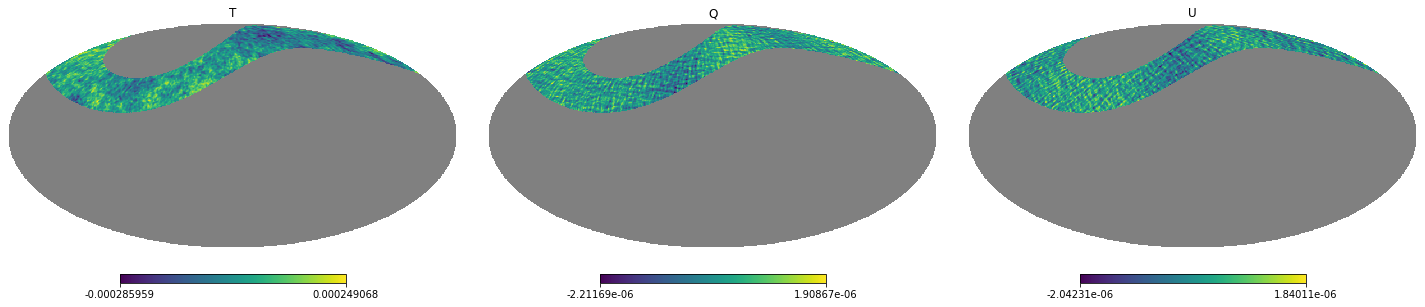

In [12]:
plt.figure(figsize=(20,7))
hp.mollview(out_map[0],sub=131,title='T')
hp.mollview(out_map[1],sub=132,title='Q')
hp.mollview(out_map[2],sub=133,title='U')

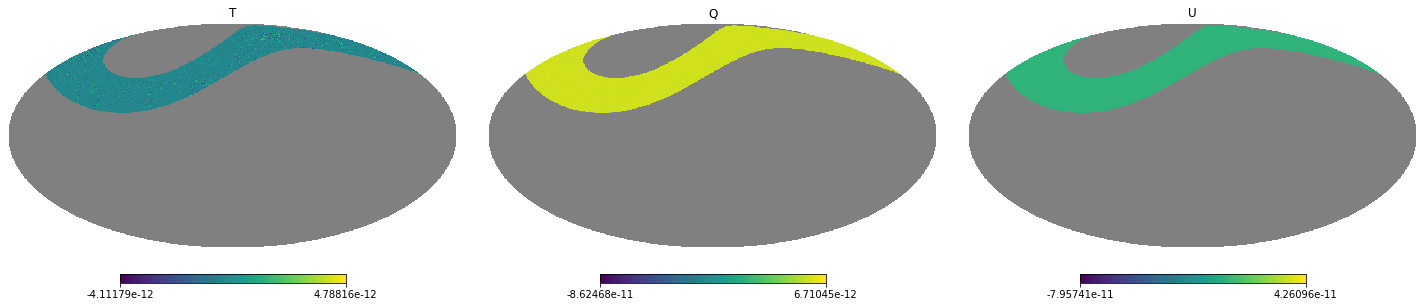

In [13]:
plt.figure(figsize=(20,7))
hp.mollview(out_map[0]-in_map['Boresight_detector_0'][0],sub=131,title='T')
hp.mollview(out_map[1]-in_map['Boresight_detector_0'][1],sub=132,title='Q')
hp.mollview(out_map[2]-in_map['Boresight_detector_0'][2],sub=133,title='U')